# Which one is a better plan?


 ## Contents <a id='back'></a>
 * [Introduction](#intro)
     * [Description of the plans](#description_of_the_plans)
     * [Project description](#project_description)
     * [Task decomposition](#data_transformation)
 * [Initialization](#initialization)
 * [Load data](#load_data)
 * [Plans](#plans)
 * [Fix and Enrich data](#fix_data)
     * [Users](#users)
     * [Calls](#calls)
     * [Messages](#messages)
     * [Internet](#internet)
     * [Plans](#plans)
 * [Study plan conditions](#study_plan_conditions)
 * [Aggregate data per user](#aggregate_data_per_user)
 * [Study user behaviour](#study_user_behaviour)
 * [Test statistical hypotheses](#test_statistical_hypotheses)
 * [General conclution](#general_conclution)

## Introduction <a id='data_review'></a>

Megaline is a telecom operator that offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

### Description of the plans

**Note**: 
- Megaline rounds seconds up to minutes, and megabytes to gigabytes. 
- For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 
- For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. 
- If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf:**
- Monthly charge: `$20`
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
- 1 minute: 3 cents 
- 1 text message: 3 cents
- 1 GB of data: $10


**Ultimate**
- Monthly charge: `$70`
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: $7


### **Project description** <a id='data_review'></a>

This is a preliminary analysis of the plans based on a relatively small client selection. 
The data on 500 Megaline clients: 
- who the clients are, 
- where they're from, 
- which plan they use, 
- and the number of calls they made and text messages they sent in 2018. 

The Purpose is to analyze the clients' behavior and determine which prepaid plan brings in more revenue. 


### **Hypothesis** <a id='data_review'></a>

- Null Hypothesis (H0): The Surf Plan brings in more revenue as it costs less and more people can affort it
- Alternative Hypothesis (H1): The Ultimate Plan brings in less revenue as it costs more and less people can affort it

The Purpose is to analyze the clients' behavior and determine which prepaid plan brings in more revenue. 

### **Task decomposition:** <a id='data_review'></a>

- Data preparation
    - Convert the data to the necessary types
    - Find and eliminate errors in the data
    
- Carrying out data analysis
    - Describe the customers' behavior
    - Find the minutes, texts, and volume of data the users of each plan require per month
    - Calculate the mean, variance, and standard deviation. Plot histograms
    - Describe the distributions
    
- Test the hypotheses
    - The average revenue from users of Ultimate and Surf calling plans differs
    - The average revenue from users in NY-NJ area is different from that of the users from other regions
    - Determine the best alpha value to use, the explain:
        - How the null and alternative hypotheses are formulated 
        - What criterion was used to test the hypotheses and why
        
- Provide an overall conclusion

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
import math
import scipy.stats as stats

## Load data

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

This project has several tables the below is an exploration of each one of the dataframes:
- To get an initial understanding of the data and
- To do the necessary corrections to each table

In [3]:
#A list of DataFrames and corresponding table titles
dataframes = [df_calls, df_internet, df_messages, df_plans, df_users]
table_titles = ["Calls", "Internet", "Messages", "Plans", "Users"]

In [4]:
#Generating into and statistical summary on the differnt tables
for df, title in zip(dataframes, table_titles):
    print("Displaying", title, "table:")
    display(df)
    
    print("Number of duplicated values in the", title, "table:", df.duplicated().sum())
    print()
    
    print("Number of missing values in the", title, "table:")
    print(df.isna().sum())
    print()
    
    print("Statistics for numeric columns in the", title, "table:")
    print(df.describe())
    print()
    
    print("Information on the", title, "table:")
    print()
    print(df.info())
    print()

Displaying Calls table:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Number of duplicated values in the Calls table: 0

Number of missing values in the Calls table:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Statistics for numeric columns in the Calls table:
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

Information on the Calls table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
Non

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


Number of duplicated values in the Internet table: 0

Number of missing values in the Internet table:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Statistics for numeric columns in the Internet table:
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

Information on the Internet table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


Number of duplicated values in the Messages table: 0

Number of missing values in the Messages table:
id              0
user_id         0
message_date    0
dtype: int64

Statistics for numeric columns in the Messages table:
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

Information on the Messages table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Displaying Plans table:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Number of duplicated values in the Plans table: 0

Number of missing values in the Plans table:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Statistics for numeric columns in the Plans table:
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


Number of duplicated values in the Users table: 0

Number of missing values in the Users table:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Statistics for numeric columns in the Users table:
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000

Information on the Users table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    objec

Investigating  the unique data in the columns:

Plans table columns:
- plan_name

Users table columns:
- city
- plan
    

In [5]:
#printing the unique values in for columns - df_plans["plan_name"] and df_users["city"]
print(df_plans["plan_name"].unique())
print()
print(df_users["city"].unique())
print()
print(df_users["plan"].unique())

['surf' 'ultimate']

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfre

## Plans

In [6]:
# Print the general/summary information about the plans' DataFrame
for df in dataframes:
    display(df.info())
    display()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [7]:
# Print a sample of data for plans
for df in dataframes:
    display(df.sample())
    display()

,id,user_id,call_date,duration
94904,1336_841,1336,2018-12-13,10.17


,id,user_id,session_date,mb_used
99634,1471_77,1471,2018-10-22,399.86


,id,user_id,message_date
27936,1172_393,1172,2018-09-24


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
282,1282,Annice,Calhoun,61,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-01,ultimate,NaN


### Initial Data Quality Assessment:

**General:**
- all the data contains a column `user_id`

**Assessment for table `df_calls`**
- Number of duplicated values in the Calls table: 0
- There are no missing values in the Calls table
- The column `call_date` is an object type however it should be a Date data type


**Assessment for table `df_internet`**
- Number of duplicated values in the Internet table: 0
- There are no missing values in the Internet table
- The column `session_date` is an object type however it should be a Date data type

**Assessment for table `df_messages`**
- Number of duplicated values in the Messages table: 0
- There are no missing values in the Messages table
- The column `message_date` is an object type however it should be a Date data type

**Assessment for table `df_plans`**
- Number of duplicated values in the Plans table: 0
- There are no missing values in the Plans table

**Assessment for table `df_users`**
- Number of duplicated values in the Users table: 0
- There are 466 missing values in the `churn_date` column (if the value is missing, the calling plan was being used when this database was extracted)
- The column `reg_date` and `churn_date` are object types however it should be a Date data types

**Next steps:**
- The date columns data types need to be corrected
- the missing data in the table `df_users`needs to be addressed


## Fix data

In [8]:
#Correcting the dates data type
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format ='%Y-%m-%d') 
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format ='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format ='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format ='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format ='%Y-%m-%d')

In [9]:
# Print the general/summary information about the plans' DataFrame
for df in dataframes:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None

<class 'pand

## Enrich data

No data enrichement required.

## Users

In [10]:
# Print the general/summary information about the users' DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [11]:
# Print a sample of data for users
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
398,1398,German,Thompson,30,"Denver-Aurora-Lakewood, CO MSA",2018-10-22,surf,NaT
79,1079,Brian,Mccall,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-26,surf,NaT
240,1240,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,surf,NaT
43,1043,Carlos,Hinton,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-20,ultimate,NaT
164,1164,Kam,Macias,31,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-17,ultimate,NaT


There are no notable issues in this dataset:
- the data types are appropriate
- the missing data in the column `churn_date` descibes instanses where the calling plan was being used when this database was extracted

### Fix Data

There are no obvious data fixes needed.

### Enrich Data

In [12]:
# Creates a new column showing the month the messages were sent
df_users['month'] = df_users['reg_date'].dt.month

#Filter nessasary columns in
df_users_new = df_users[["user_id", "plan", "month", "city"]].copy()
df_users_new.head(5)

,user_id,plan,month,city
0,1000,ultimate,12,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,8,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,10,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,1,"Tulsa, OK MSA"
4,1004,surf,5,"Seattle-Tacoma-Bellevue, WA MSA"


## Calls

In [13]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [14]:
# Print a sample of data for calls
df_calls.sample(5)

,id,user_id,call_date,duration
44225,1160_241,1160,2018-06-20,8.68
109917,1387_289,1387,2018-09-21,0.00
106067,1374_163,1374,2018-11-05,8.17
8731,1041_166,1041,2018-08-03,2.29
71915,1255_939,1255,2018-08-17,0.20


Data observation:

There are two id columns one is `id` and the other `user_id` the `id` contains the all numbers in the `user_id`and then it ends with the symbol `_`and another set of numbers not in the `user_id`. 

### Fix data

There are no obvious data fixes needed.

### Enrich data

In [15]:
df_calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [16]:
# Creates a new column showing the month the call was made
df_calls['month'] = df_calls['call_date'].dt.month

#remove unnessasary columns
df_calls = df_calls.drop('id',axis=1)
df_calls.head(5)

,user_id,call_date,duration,month
0,1000,2018-12-27,8.52,12
1,1000,2018-12-27,13.66,12
2,1000,2018-12-27,14.48,12
3,1000,2018-12-28,5.76,12
4,1000,2018-12-30,4.22,12


## Messages

In [17]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
# Print a sample of data for messages
df_messages.sample(5)

,id,user_id,message_date
43815,1293_72,1293,2018-12-29
56424,1356_95,1356,2018-10-23
52994,1339_128,1339,2018-12-12
50344,1329_148,1329,2018-10-29
27323,1167_280,1167,2018-06-30


Data observation:

There are two id columns one is `id` and the other `user_id` the `id` contains the all numbers in the `user_id`and then it ends with the symbol `_`and another set of numbers not in the `user_id`. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice observation, you really have an attention to detail, keep it up.
</div>

### Fix data

There are no obvious data fixes needed.

### Enrich data

In [19]:
df_messages.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [20]:
# Creates a new column showing the month the messages were sent
df_messages['month'] = df_messages['message_date'].dt.month

#remove unnessasary columns
df_messages = df_messages.drop('id',axis=1)
df_messages.head(5)

,user_id,message_date,month
0,1000,2018-12-27,12
1,1000,2018-12-31,12
2,1000,2018-12-31,12
3,1000,2018-12-27,12
4,1000,2018-12-26,12


## Internet

In [21]:
# Print the general/summary information about the internet DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [22]:
# Print a sample of data for the internet traffic
df_internet.sample(5)

,id,user_id,session_date,mb_used
63554,1292_258,1292,2018-08-06,771.45
10315,1053_311,1053,2018-09-03,356.42
104705,1499_100,1499,2018-10-14,588.29
91793,1425_150,1425,2018-11-29,391.29
82997,1387_213,1387,2018-09-30,296.23


Data observation:

There are two id columns one is `id` and the other `user_id` the `id` contains the all numbers in the `user_id`and then it ends with the symbol `_`and another set of numbers not in the `user_id`. 

### Fix data

There are no obvious data fixes needed.

### Enrich data

In [23]:
df_internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [24]:
# Creates a new column showing the month of the internet session
df_internet['month'] = df_internet['session_date'].dt.month

#remove unnessasary columns
df_internet = df_internet.drop('id',axis=1)
df_internet.head(5)

,user_id,session_date,mb_used,month
0,1000,2018-12-29,89.86,12
1,1000,2018-12-31,0.00,12
2,1000,2018-12-28,660.40,12
3,1000,2018-12-26,270.99,12
4,1000,2018-12-27,880.22,12


## Study plan conditions

## Aggregate data per user

The data is now clean.
Aggregation of data: per user per period in order to have just one record per user per period.

In [25]:
# Calculate the number of calls made by each user per month. Save the result.
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)
df_calls.head(5)

,user_id,call_date,duration,month
0,1000,2018-12-27,9,12
1,1000,2018-12-27,14,12
2,1000,2018-12-27,15,12
3,1000,2018-12-28,6,12
4,1000,2018-12-30,5,12


In [26]:
# Calculate the amount of minutes spent by each user per month. Save the result.
df_calls['duration'] = df_calls['duration'].apply(lambda x: int(round(x, 0)))

# Group by user_id and month, and then sum(add) the durations
minutes = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Rename the 'duration' column to 'minutes'
minutes.rename(columns={'duration': 'minutes'}, inplace=True)

df_calls.head(5)

,user_id,call_date,duration,month
0,1000,2018-12-27,9,12
1,1000,2018-12-27,14,12
2,1000,2018-12-27,15,12
3,1000,2018-12-28,6,12
4,1000,2018-12-30,5,12


In [27]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages = (df_messages.groupby(['user_id','month'])
         .agg({'user_id':'count'})
         .rename(columns={'user_id':'messages'}))

df_messages.head(5)

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36

In [28]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

df_internet_two = (df_internet.groupby(['user_id','month'])
               .agg({'user_id':'count','mb_used':'sum'})
               .rename(columns={'user_id':'session','mb_used':'mb_used'}))


# Convert megabyte used to gigabyte used, round up, and convert to integer
df_internet_two['gb_used'] = np.ceil(df_internet_two['mb_used'] / 1024).astype(int)

df_internet_two.head(5)

session   mb_used  gb_used
user_id month                            
1000    12           5   1901.47        2
1001    8           25   6919.15        7
        9           53  13314.82       14
        10          56  22330.49       22
        11          51  18504.30       19

In [29]:
#remove unnessasary columns
df_internet_two = df_internet_two.drop('mb_used',axis=1)
df_internet_two.head(5)

session  gb_used
user_id month                  
1000    12           5        2
1001    8           25        7
        9           53       14
        10          56       22
        11          51       19

Aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month

In [30]:
# Create new dataframe by merging calls with messages aggregated data on user id
user_details = minutes.merge(df_messages, on=["user_id", "month"], how="outer")

# Update the dataframe by merging again with the aggregated data from internet still    
user_details = user_details.merge(df_internet_two, on=["user_id", "month"], how="outer")

# Update the dataframe again by merging with users data, take note of the important information
user_details = user_details.merge(df_users_new[["user_id", "city", "plan"]], on="user_id", how="inner")
    
print(f"The dimension of merged dataframe: {user_details.shape}")
user_details.head()
  


The dimension of merged dataframe: (2293, 8)


,user_id,month,minutes,messages,session,gb_used,city,plan
0,1000,12,124.0,11.0,5.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,182.0,30.0,25.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,315.0,44.0,53.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,393.0,53.0,56.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,426.0,36.0,51.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [31]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   minutes   2258 non-null   float64
 3   messages  1806 non-null   float64
 4   session   2277 non-null   float64
 5   gb_used   2277 non-null   float64
 6   city      2293 non-null   object 
 7   plan      2293 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 161.2+ KB


In [32]:
#checking for missing (NaN) values
nan_counts = user_details.isna().sum()
print(nan_counts)

user_id       0
month         0
minutes      35
messages    487
session      16
gb_used      16
city          0
plan          0
dtype: int64


This data contains NaN values which needs to be addressed.

In [33]:
#Fill all NaN values in the merged dataset with zero
user_details.fillna(0, inplace=True)

In [34]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   minutes   2293 non-null   float64
 3   messages  2293 non-null   float64
 4   session   2293 non-null   float64
 5   gb_used   2293 non-null   float64
 6   city      2293 non-null   object 
 7   plan      2293 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 161.2+ KB


In [35]:
#checking for missing (NaN) values
nan_counts = user_details.isna().sum()
print(nan_counts)

user_id     0
month       0
minutes     0
messages    0
session     0
gb_used     0
city        0
plan        0
dtype: int64


NaN values have been addressed and replaced with zero.

In [36]:
user_details.shape

(2293, 8)

### Description of the plans

**Note**: 
- Megaline rounds seconds up to minutes, and megabytes to gigabytes. 
- For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 
- For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. 
- If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf:**
- Monthly charge: `$20`
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
- 1 minute: 3 cents 
- 1 text message: 3 cents
- 1 GB of data: $10


**Ultimate**
- Monthly charge: `$70`
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: $7



### Calculate the monthly revenue from each user 


In [39]:
user_details

,user_id,month,minutes,messages,session,gb_used,city,plan
0,1000,12,124.0,11.0,5.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,182.0,30.0,25.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,315.0,44.0,53.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,393.0,53.0,56.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,426.0,36.0,51.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,78.0,80.0,36.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate
2289,1349,10,0.0,76.0,26.0,13.0,"Boston-Cambridge-Newton, MA-NH MSA",surf
2290,1349,11,0.0,72.0,32.0,17.0,"Boston-Cambridge-Newton, MA-NH MSA",surf
2291,1349,12,0.0,61.0,27.0,13.0,"Boston-Cambridge-Newton, MA-NH MSA",surf


In [40]:
# Define a function to calculate the basic plan cost based on the 'plan' column
def calculate_basic_plan_cost(plan):
    if plan == 'ultimate':
        return 70
    elif plan == 'surf':
        return 20
    else:
        return 0  # Default to 0 for unknown plans

# Calculate the 'basic plan cost' column
user_details['basic plan cost'] = user_details['plan'].apply(calculate_basic_plan_cost)

# Define the package limits and extra costs for Surf and Ultimate plans
surf_limits = {
    'minutes': 500,
    'texts': 50,
    'data_gb': 15
}

ultimate_limits = {
    'minutes': 3000,
    'texts': 1000,
    'data_gb': 30
}

surf_extra_costs = {
    'minutes': 0.03,  # 3 cents per minute
    'texts': 0.03,    # 3 cents per text
    'data_gb': 10     # $10 per GB
}

ultimate_extra_costs = {
    'minutes': 0.01,  # 1 cent per minute
    'texts': 0.01,    # 1 cent per text
    'data_gb': 7      # $7 per GB
}

# Calculate the 'extra_cost' column based on the actual usage and package limits
    
def calculate_extra_cost(row):
    plan = row['plan']
    minutes = row['minutes']
    texts = row['messages']
    data_gb = row['gb_used'] / 1024  # Convert MB to GB

    if plan == 'surf':
        extra_cost = max(0, (minutes - surf_limits['minutes'])) * surf_extra_costs['minutes']
        extra_cost += max(0, (texts - surf_limits['texts'])) * surf_extra_costs['texts']
        extra_cost += max(0, (row["gb_used"] - surf_limits['data_gb'])) * surf_extra_costs['data_gb']
    elif plan == 'ultimate':
        extra_cost = max(0, (minutes - ultimate_limits['minutes'])) * ultimate_extra_costs['minutes']
        extra_cost += max(0, (texts - ultimate_limits['texts'])) * ultimate_extra_costs['texts']
        extra_cost += max(0, (data_gb - ultimate_limits['data_gb'])) * ultimate_extra_costs['data_gb']
    else:
        extra_cost = 0

    return extra_cost

# Calculate the 'extra_cost' column based on the actual usage and package limits
user_details['extra_cost'] = user_details.apply(calculate_extra_cost, axis=1)

# Calculate the 'total_revenue' column by adding 'basic plan cost' and 'extra_cost'
user_details['total_revenue'] = user_details['basic plan cost'] + user_details['extra_cost']

user_details.head()

,user_id,month,minutes,messages,session,gb_used,city,plan,basic plan cost,extra_cost,total_revenue
0,1000,12,124.0,11.0,5.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,0.00,70.00
1,1001,8,182.0,30.0,25.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,0.00,20.00
2,1001,9,315.0,44.0,53.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,0.00,20.00
3,1001,10,393.0,53.0,56.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,70.09,90.09
4,1001,11,426.0,36.0,51.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,40.00,60.00


In [41]:
# Calculate the total sum of the 'total_revenue' column
total_revenue_sum = user_details['total_revenue'].sum()

# Print the result
print("Total Revenue:", total_revenue_sum)

Total Revenue: 145891.18


In [42]:
# calculate total revene for each plan per month

plan_month_groups = user_details.groupby(['plan', 'month'])
total_revenue_per_month = plan_month_groups['total_revenue'].sum()
total_revenue_per_month = total_revenue_per_month.reset_index()
total_revenue_per_month

,plan,month,total_revenue
0,surf,1,40.00
1,surf,2,309.57
2,surf,3,1056.65
3,surf,4,2035.53
4,surf,5,3667.37
5,surf,6,4779.80
6,surf,7,7583.56
7,surf,8,10356.85
8,surf,9,11304.67
9,surf,10,15504.83


Text(0.5, 1.0, 'Total Revenue per Month for Surf and Ultimate Plans')

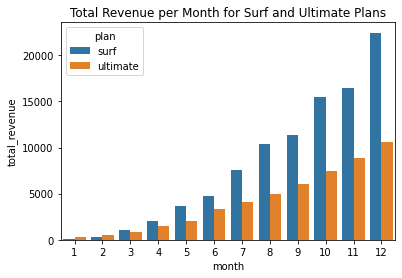

In [43]:
# Create a bar plot for total revenue per month

sns.barplot(data=total_revenue_per_month, x="month", y="total_revenue", hue="plan")
plt.title("Total Revenue per Month for Surf and Ultimate Plans")

**Total Revenue comparison of Surf and Ultimate plans**

The Ultimate plan generates more revenue across the year.

## Study user behaviour

## Calls

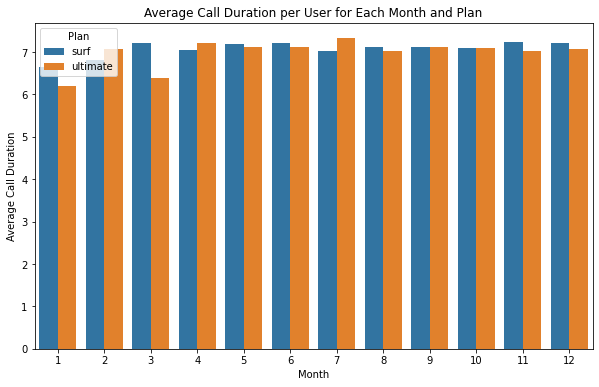

In [44]:
# Compare average duration of calls per each plan per each distinct month.
mean_call = df_calls.groupby(['month', 'user_id'])['duration'].mean().reset_index()
merged_data = mean_call.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn and remove lines (ci=None)
sns.barplot(data=merged_data, x="month", y="duration", hue="plan", ci=None)

plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per User for Each Month and Plan')
plt.legend(title='Plan')
plt.show()

The general average duration of calls for both plans is the same there are no notable differences.

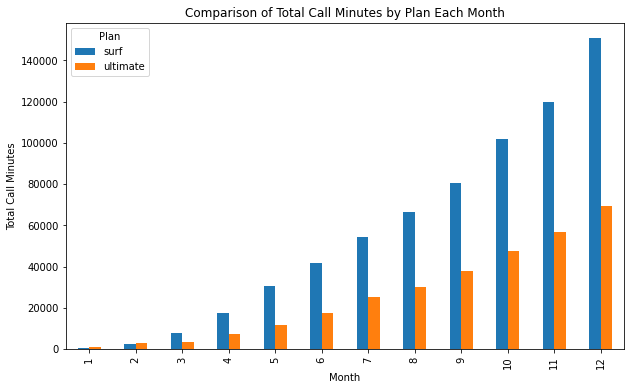

In [45]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plan_minutes = user_details.groupby(['plan', 'month'])['minutes'].sum().reset_index()

# Create a pivot table to have 'month' as rows and 'plan' as columns
pivot_plan_minutes = plan_minutes.pivot(index='month', columns='plan', values='minutes')

# Plot a bar chart to compare the minutes used for each plan each month
pivot_plan_minutes.plot(kind='bar', figsize=(10, 6))

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Total Call Minutes')
plt.title('Comparison of Total Call Minutes by Plan Each Month')

# Show the plot
plt.legend(title='Plan')
plt.show()

**Comparison of Total Call Minutes by Plan Each Month**

For January to March the calls all range below 2000

* January and February: Ultimate has slightly higher calls than Surf
    * The call minutes are all below 2000 minutes
*  March to December: Surf has substantially higher calls than Ultimate
    * the call duration for the Surf users spikes from May being above 2000 minutes nd in December surpassing 14000 minutes - these call increase at a steady rate ase the year goes.
    * the call duration for the Ultimate spickes as well but never above 8000

The long calls during these times of the months could be attributed towards coals that are made to family during holidays. The surf users make more calls at a cheaper rate and the ulitimate users are less inclined to incurre more costs.

In [46]:
# Calculate the mean and the variance of the monthly call duration

# Group the data by 'month' and calculate the mean and variance of call duration for each month
monthly_call_stats = user_details.groupby('month')['minutes'].agg(['mean', 'var']).reset_index()

# Rename the columns for clarity
monthly_call_stats.rename(columns={'mean': 'mean_duration', 'var': 'variance_duration'}, inplace=True)

# Display the resulting DataFrame
print(monthly_call_stats)

    month  mean_duration  variance_duration
0       1     196.666667       13135.866667
1       2     343.437500       61567.329167
2       3     321.171429       43378.499160
3       4     347.197183       45620.531992
4       5     401.405660       54950.510063
5       6     411.604167       45086.240822
6       7     442.472222       64525.781347
7       8     413.562232       53926.747188
8       9     421.378571       49735.899181
9      10     436.221574       52829.190527
10     11     430.100000       54351.738142
11     12     469.091684       63180.258670


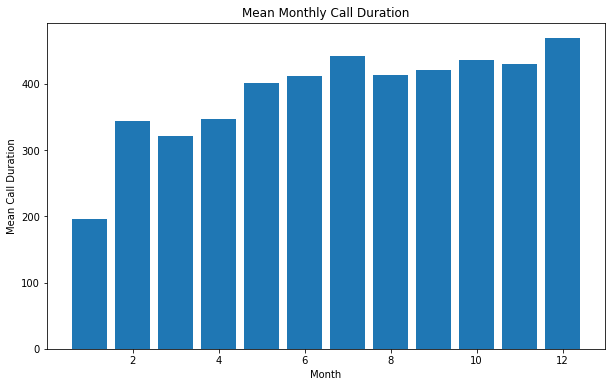

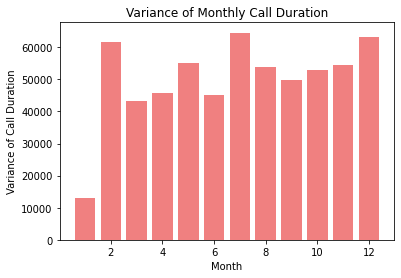

In [47]:
plt.figure(figsize=(10, 6))

# Plot a bar chart for the mean monthly call duration
plt.bar(monthly_call_stats['month'], monthly_call_stats['mean_duration'])

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Mean Call Duration')
plt.title('Mean Monthly Call Duration')

# Show the plot
plt.show()


# Plot a bar chart for the variance of monthly call duration
plt.bar(monthly_call_stats['month'], monthly_call_stats['variance_duration'], color='lightcoral')

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Variance of Call Duration')
plt.title('Variance of Monthly Call Duration')

# Show the plot
plt.show()

The call average and variancee are matched - this indicates that the data follows a normal distribution. 

### Messages

In [48]:
# Calculate the mean and the variance of the monthly messages

# Group the data by 'month' and calculate the mean and variance of messegaes for each month
monthly_messages_stats = user_details.groupby('month')['messages'].agg(['mean', 'var']).reset_index()

# Rename the columns for clarity
monthly_messages_stats.rename(columns={'mean': 'mean_messages', 'var': 'variance_messages'}, inplace=True)

# Display the resulting DataFrame
print(monthly_messages_stats)

    month  mean_messages  variance_messages
0       1      13.833333         238.966667
1       2      16.187500         421.229167
2       3      16.971429         441.734454
3       4      18.774648         511.148491
4       5      26.226415         972.291105
5       6      26.618056         893.706245
6       7      28.933333         938.051397
7       8      31.733906        1095.446130
8       9      32.953571        1025.442281
9      10      35.571429        1261.771930
10     11      34.312195        1122.582003
11     12      40.663113        1493.270880


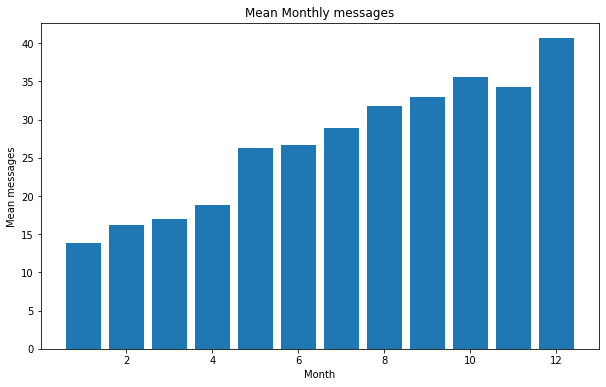

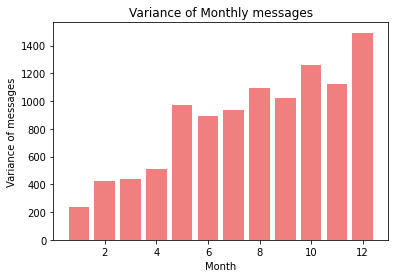

In [49]:
plt.figure(figsize=(10, 6))

# Plot a bar chart for the mean monthly messages
plt.bar(monthly_messages_stats['month'], monthly_messages_stats['mean_messages'])

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Mean messages')
plt.title('Mean Monthly messages')

# Show the plot
plt.show()


# Plot a bar chart for the variance of monthly messages
plt.bar(monthly_messages_stats['month'], monthly_messages_stats['variance_messages'],color='lightcoral')

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Variance of messages')
plt.title('Variance of Monthly messages')

# Show the plot
plt.show()

The messages average and variancee are matched - this indicates that the data follows a normal distribution. 

### Internet

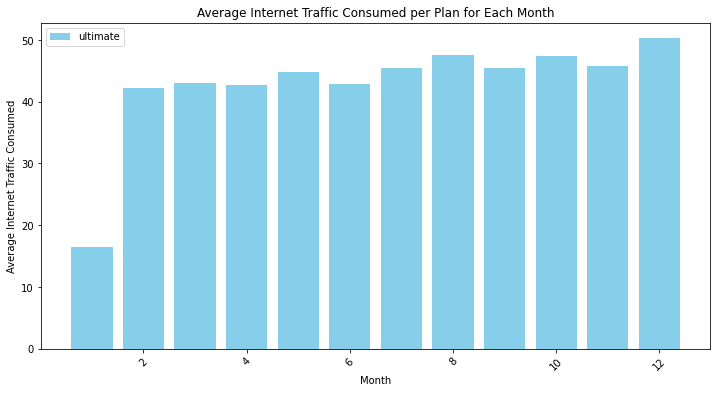

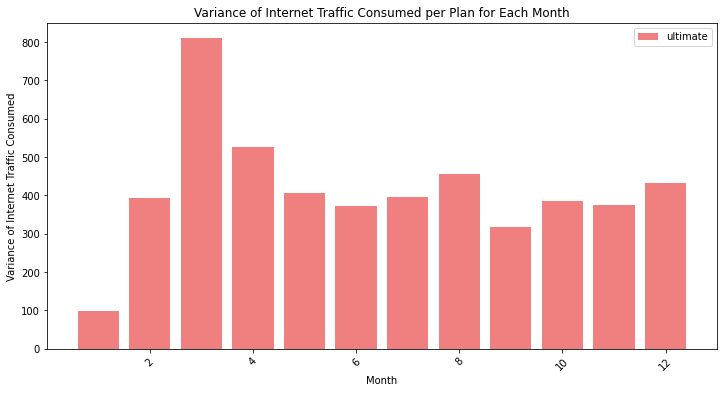

In [50]:
# Compare the amount of internet traffic consumed by users per plan

mean_internet = user_details.groupby(['month', 'plan'])['session'].mean().reset_index()
variance_internet = user_details.groupby(['month', 'plan'])['session'].var().reset_index()

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create the bar plot for mean internet traffic consumed
plt.bar(mean_internet['month'], mean_internet['session'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic Consumed')
plt.title('Average Internet Traffic Consumed per Plan for Each Month')
plt.xticks(rotation=45)
plt.legend(user_details['plan'].unique())  # Legend for plans
plt.show()

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create the bar plot for variance of internet traffic consumed
plt.bar(variance_internet['month'], variance_internet['session'], color='lightcoral')
plt.xlabel('Month')
plt.ylabel('Variance of Internet Traffic Consumed')
plt.title('Variance of Internet Traffic Consumed per Plan for Each Month')
plt.xticks(rotation=45)
plt.legend(user_details['plan'].unique())  # Legend for plans
plt.show()

The internet average and variancee are mismatched - the varinace increases as the year goes yet the mean generally remains the same.

## Revenue

In [51]:
revenue_stats = user_details.groupby('plan')['total_revenue'].describe()
print(revenue_stats)

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  70.000000   0.000000  70.0  70.0  70.00  70.00   70.00


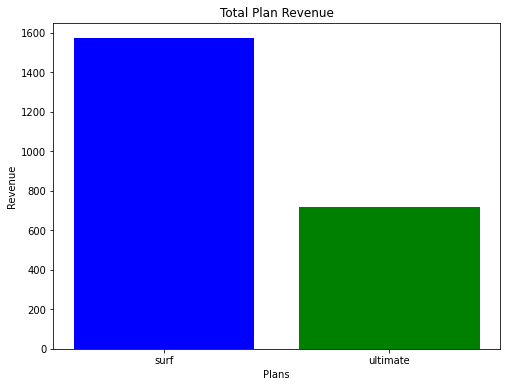

In [52]:
plans = ["surf", "ultimate"]
revenue = [1573, 720.0]

# Create a bar graph
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(plans, revenue, color=['blue', 'green'])
plt.xlabel("Plans")
plt.ylabel("Revenue")
plt.title("Total Plan Revenue")
plt.show()

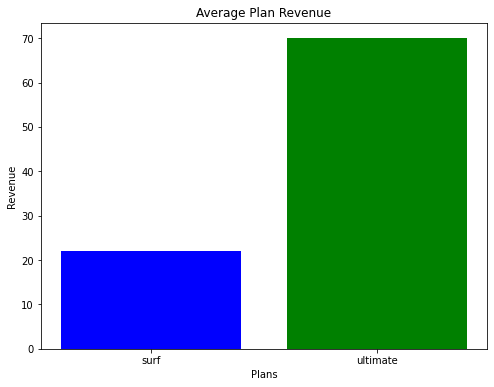

In [53]:
plans = ["surf", "ultimate"]
revenue = [22.054151, 70.000000]

# Create a bar graph
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(plans, revenue, color=['blue', 'green'])
plt.xlabel("Plans")
plt.ylabel("Revenue")
plt.title("Average Plan Revenue")
plt.show()

The surf plan does bring in more customers than the Ulitmate plan. More people are inclined to pay less for the plans in generl and opt for the less costly plan. The Surf plan has far mor grater subscriptions that the Ulitmate plan with 1573 and 720 subscriptions respectively.

Statistical points

- count:
    - surf      1573.0
    - ultimate  720  

- mean:
    - surf      22.054151
    - ultimate  70.000000

- std:
    - surf      3.955081
    - ultimate  0.000000

- min:
    - surf      20.0
    - ultimate  70.0

- 25%
    - surf      20.0
    - ultimate  70.0

- 50%
    - surf      20.0
    - ultimate  70.0

- 75%   
    - surf      22.58
    - ultimate  70.0

- max
    - surf      52.55
    - ultimate  70.0

Customers are unwilling to pay more than $70 which is the minimun for the Ulitmate plan however for the Surf plan customers are a little more inclined to pay a little more. 

It is notable that gerenerally customers stick to their given plan and do not deviate.


## Test statistical hypotheses

**The Hypothesis**

- Null Hypothesis (H0): The average revenue from users of the Ultimate and Surf calling plans is the same.
- Alternative Hypothesis (H1): The average revenue from users of the Ultimate and Surf calling plans differs.

In [54]:
average_revenue_ultimate = user_details[user_details['plan'] == 'ultimate']['total_revenue'].mean()
print("Average Revenue from Users of the Ultimate Plan:", average_revenue_ultimate)

average_revenue_surf = user_details[user_details['plan'] == 'surf']['total_revenue'].mean()
print("Average Revenue from Users of the Surf Plan:", average_revenue_surf)

Average Revenue from Users of the Ultimate Plan: 70.0
Average Revenue from Users of the Surf Plan: 60.706408137317226


In [55]:
var_revenue_ultimate = user_details.query("plan == 'ultimate'")["total_revenue"].var()
print("Variance Revenue from Users of the Ultimate Plan:", var_revenue_ultimate)

var_revenue_surf = user_details.query("plan == 'surf'")["total_revenue"].var()
print("Variance Revenue from Users of the Surf Plan:", var_revenue_surf )

Variance Revenue from Users of the Ultimate Plan: 0.0
Variance Revenue from Users of the Surf Plan: 3067.835152293878


In [56]:
# Separate data for Ultimate and Surf plans
revenue_ultimate = user_details[user_details['plan'] == 'ultimate']['total_revenue']
revenue_surf = user_details[user_details['plan'] == 'surf']['total_revenue']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

#Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 6.6547531071197925
P-value: 3.907643940984506e-11



**The statistical test**

The statistical test goes about testing which hypothesis is true or which applies to the dataset

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups or populations. 

For a two-sample t-test. This test calculates a t-statistic and a p-value to help you decide whether to reject the null hypothesis.

**T-Statistic:** T-statistic: 7968.319066484109
- The t-statistic is a measure of the difference between the means of two groups (users of the "Ultimate" and "Surf" plans)
- relative to the variation within each group


**P-Value:** P-value: 0.0
- The p-value is the probability of obtaining results
- assuming that the null hypothesis is true. 

**The Alpha Value (Significance Level)**

Is the probability of obtaioning a particular value 

- often denoted as α, 
- is the chosen threshold that determines the level of significance in a hypothesis test
- It represents the maximum acceptable probability of making a Type I error (rejection of  the null hypothesis)
- Common alpha values include 0.05 (5%) or 0.01 (1%) 

A smaller p-value suggests stronger evidence against the null hypothesis. in the case above the p-value is less than the T-statistic this then rejects the Null Hypothesis (H0).

Concluding that the Alternative Hypothesis (H1)is true - the average revenue from users of the Ultimate and Surf plans differs.

In [57]:
alpha = 0.05

sample_1 = user_details[user_details["city"].str.contains("NY-NJ", case=False)]['total_revenue']
sample_2 = user_details[~user_details["city"].str.contains("NY-NJ", case=False)]['total_revenue']

# Perform the t-test
t_stat, p_value = st.ttest_ind(sample_1, sample_2, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

T-statistic: -2.224466015076995
P-value: 0.02651113487203052
We reject the null hypothesis


## General conclusion


- The Surf Plan Generates More Revenue:
    - because it costs less at $20, making it more affordable to a customers it has attracted more of a customer bas with 1500 subscriptions

- Customers are unwilling to pay more than $70 
    - which is the minimun for the Ulitmate plan 
    - however for the Surf plan customers are a little more inclined to pay a little more
    
- the average revenue from users of the Ultimate and Surf plans differs

- It is notable that gerenerally customers stick to their given plan and do not deviate

- It may be an added sercive to include more plans to accodate customer needs further than they are now

The Surf plan is the better plan in that it does better with the customer base.